In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [13]:
my_data_dir = 'C:\\Users\\aykul\\OneDrive\\Masaüstü\\Veri Seti' #data directory

In [14]:
os.listdir(my_data_dir) 

['Test', 'Train']

In [15]:
test_path = my_data_dir+'\\Test'
train_path = my_data_dir+'\\Train'

In [16]:
os.listdir(train_path+'\\True')[1]

'1 - Kopya (3)_result.png'

In [17]:
signature = train_path+'\\True'+'\\1 - Kopya (3)_result.png'

In [18]:
sig_img = imread(signature)

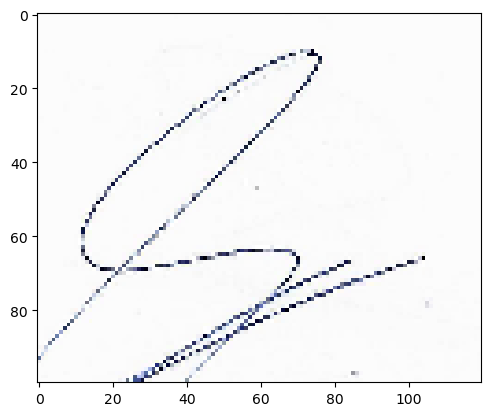

In [19]:
plt.imshow(sig_img)

In [20]:
sig_img.shape

(100, 120, 4)

In [21]:
sig_img

array([[[0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        ...,
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ]],

       [[0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        ...,
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ]],

       [[0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        ...,
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.9882353, 1.       ],
        [0.9882353, 0.9882353, 0.988235

In [22]:
image_shape = (100, 120,3)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

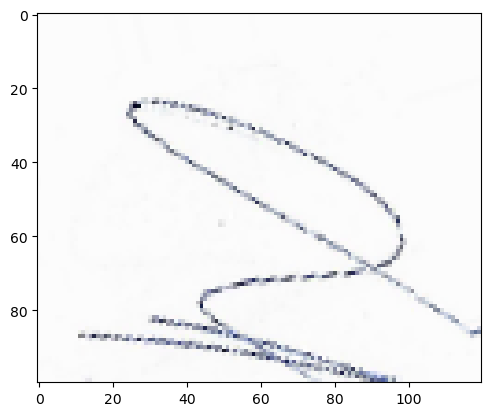

In [25]:
plt.imshow(image_gen.random_transform(sig_img))

In [26]:
image_gen.flow_from_directory(train_path)

Found 480 images belonging to 2 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 120 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [29]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 118, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 13, 128)      0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
#early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [33]:
batch_size = 10

In [34]:
train_image_gen =image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 480 images belonging to 2 classes.


In [35]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 120 images belonging to 2 classes.


In [36]:
train_image_gen.class_indices

{'False': 0, 'True': 1}

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
results = model.fit_generator(train_image_gen,epochs=200,
                              validation_data=test_image_gen
                             #,callbacks=[early_stop]
                             )

Epoch 1/200
48/48 [==============================] - 4s 72ms/step - loss: 0.2182 - accuracy: 0.9187 - val_loss: 0.3739 - val_accuracy: 0.8417
Epoch 2/200
48/48 [==============================] - 3s 69ms/step - loss: 0.0741 - accuracy: 0.9729 - val_loss: 0.3467 - val_accuracy: 0.8500
Epoch 3/200
48/48 [==============================] - 3s 69ms/step - loss: 0.0510 - accuracy: 0.9854 - val_loss: 0.5808 - val_accuracy: 0.8333
Epoch 4/200
48/48 [==============================] - 3s 69ms/step - loss: 0.0537 - accuracy: 0.9812 - val_loss: 0.3348 - val_accuracy: 0.9000
Epoch 5/200
48/48 [==============================] - 3s 70ms/step - loss: 0.0413 - accuracy: 0.9917 - val_loss: 0.2783 - val_accuracy: 0.9000
Epoch 6/200
48/48 [==============================] - 3s 70ms/step - loss: 0.0958 - accuracy: 0.9729 - val_loss: 0.6696 - val_accuracy: 0.8583
Epoch 7/200
48/48 [==============================] - 3s 70ms/step - loss: 0.0295 - accuracy: 0.9875 - val_loss: 1.1155 - val_accuracy: 0.8333
Epoch 

In [54]:
from tensorflow.keras.models import load_model
model.save('Ysa_Proje_200epoch.h5')

In [55]:
losses = pd.DataFrame(model.history.history)

In [56]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.218165,0.918750,0.373907,0.841667
1,0.074066,0.972917,0.346745,0.850000
2,0.050971,0.985417,0.580827,0.833333
3,0.053692,0.981250,0.334847,0.900000
4,0.041274,0.991667,0.278318,0.900000


<Axes: >

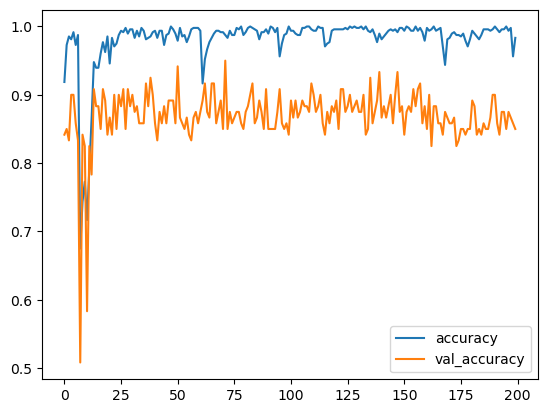

In [57]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

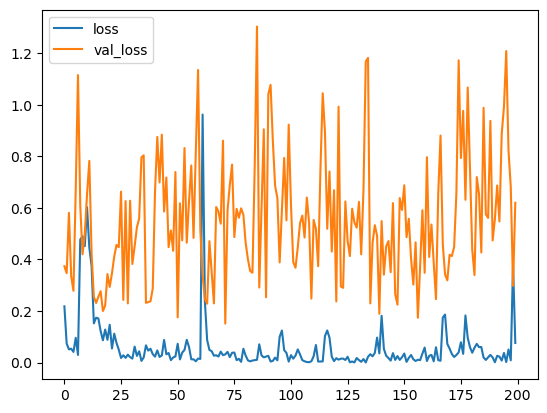

In [58]:
losses[['loss','val_loss']].plot()

In [59]:
model.evaluate_generator(test_image_gen)

[0.6228300333023071, 0.875]

In [60]:
pred_probabilities = model.predict_generator(test_image_gen)

In [61]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
predictions = pred_probabilities > 0.5

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.49      0.38      0.43        60
           1       0.49      0.60      0.54        60

    accuracy                           0.49       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.49      0.49      0.49       120



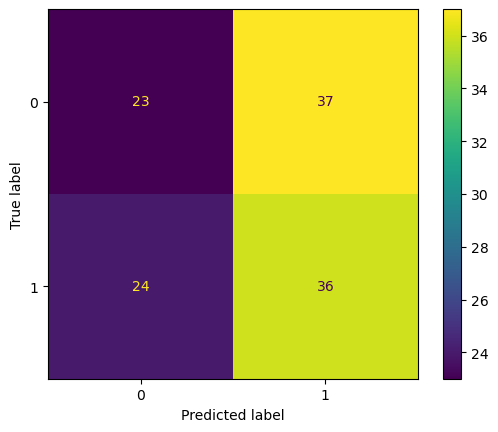

In [65]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(test_image_gen.classes,predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()